# **Last Homework – Finding Odd Shapes**

Due to the very sad events that took place on the Krakowskie Przedmieście Campus, the semester schedule has changed for the Monday and Thursday groups. To accommodate these changes, students in all groups receive a **combined homework assignment for both Class 13 and Class 14**.

## **RULES**

### **Deadline**

**The deadline for this homework is July 2nd, 23:59.**

### **Grading Criteria**

This homework will be graded on a scale from 0 to 4 points - plus a **bonus**.

- **4 points** (equivalent to completing two homework assignments worth 2 points each):
  - **the solution must attain an RMSE of 5.0 pixels or lower** (on 25,000 samples).
  - the sizes of all tensors must be annotated in comments
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **3 points** (equivalent to completing one homework assignment worth 2 points):
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - the sizes of all tensors must be annotated in comments
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **2 points** (equivalent to completing one homework assignment worth 2 points):
  - missing any one of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **1 point** (equivalent to submitting an incomplete homework assignment):
  - missing any two of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **0 points** (equivalent to not completing the homework assignment):
  - missing any three of the following:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **BONUS** – This homework encompasses all key elements from previous classes on deep neural networks.  
As a result, any student who obtains an **RMSE of 3.0 pixels or below** (on 25,000 samples), and whose solution would otherwise qualify for 4 points, **will receive the full 14 points** — equivalent to completing all homework assignments related to deep learning — regardless of their previous scores.



## **HOMEWORK ASSIGNMENT DESCRIPTION AND INSTRUCTIONS**

### **Online Dataset**

The code provided below generates an *online* dataset `OddXYDataset`.

The term *online* means that the dataset does not have a fixed set of pre-generated examples (like a traditional training set of fixed size). Instead, new samples are generated dynamically each time they are requested.

While the number of possible examples is finite in principle, it is so large that — for practical purposes — we can consider it to be effectively infinite.

In this setting, there is no need to use a separate validation or test set: the training error itself is a good estimate of the generalization error, since every training sample is new and unseen.

Consequently, the notion of an *epoch* becomes a matter of convention. For this assignment, we define one epoch as processing 25,000 training examples.

### **Training strategies**

Overfitting is not a problem in the *online* setting — but training can still stagnate in local minima or flat regions of the loss landscape.  
To address this, you will likely need to try one or more of the following strategies:

- **Multiple restarts** with different random seed values;
- **Adaptive learning rate** — consider researching training schedulers (this topic was not covered in class);
- **Progressive model growth** — start with a simpler architecture and gradually add components during training,
  so that the parts already present can learn what to do before the rest is introduced.

### **DataLoader**

The `show_examples()` function demonstrate how to wrap the dataset into a `torch.utils.data.DataLoader` so it becomes directly usable for the training/testing of a neural network.

### **Data Description**

By examining the provided code and a few sample images generated from this dataset, you will notice that:

1. **Each data sample** is a 64×64 black-and-white image with the following characteristics:
  - It contains several shapes of the same type (either circles, triangles, or squares), randomly placed and varying in size;
  - It includes one additional shape of a different type — the *odd* shape — also placed at a random location;
  
  **Note that these shapes may overlap partially or even completely, potentially hiding the odd shape.**

2. **The label** associated with each image is a 2D point indicating the coordinates of the center of the odd shape.

### **The Homework Objective**

Students should design an architecture of an **attention-based neural network** and train it so that it attains an RMSE (Root Mean Square Error, defined as the square root of the MSE) of **5.0 or lower**. Due to the nature of the online dataset, there is no need to test the solution on a separate test set.

Students should visualize the attention matrices in the trained network and **discuss what they observe** — not just describe them.  
Focus on interpreting the patterns: Where is the model attending? Are there any consistent behaviors across samples? Does attention correlate with the position of the odd shape? What do surprising or unclear patterns tell us?

A few technical requirements to observe:

- Seed all random number generators so that (1) your results are replicable and (2) I can rerun your solution and obtain the same output — *in case I need to check something*.

- Make sure your Colab file contains a **fully trained solution** with:
  - printed training output,
  - attention diagrams,
  - and a plot of the training loss curve.

This way, I don’t have to rerun your code unless absolutely necessary.

### **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.

## **SOLUTION SUGGESTIONS**

Students **do not need to follow these suggestions** — these are simply the strategies that worked for me.

The goal of the homework is, of course, to find the location of the odd shape. For that reason, it seems worthwhile to consider a *position-aware* variant of the post-processing of attention results. The solution I propose consists of the following components:


0. **Input**  
   Our input is a black-and-white image with 1 channel, of size 64×64 pixels.

1. **Embedding**  
  In class, we embedded a sequence of tokens in a multidimensional space, resulting in a sequence of embeddings. We also saw how such sequences are compatible with positional encoding and attention mechanisms used in subsequent stages.

  Here, we need to process an image that contains shapes of interest at various spatial locations.  
  To do this, I designed a Convolutional Neural Network with:
  - 1 input channel,
  - an input grid of 64x64 pixels,
  - and an output feature map arranged as a 12x12 grid with 16 channels.

  I used **no padding**, and each output neuron has a **receptive field of size 20x20** with a **stride of 4x4**.  
  This architectural choice yields **144 distinct positions** (12x12), each represented by a 16-dimensional feature vector.

  We can treat this as a sequence of 144 embeddings in 16-dimensional space — making it fully compatible with the attention mechanisms used later in the model.


2. **Positional Encoding**  
  I applied sinusoidal positional encoding, just like in class, using 16 positional dimensions to match the 16 feature dimensions of the image embeddings.  

  Positions were encoded based on their indices from 0 to 143.

3. **Attention**  
   I used full self-attention, where input tokens are linearly projected into Query, Key, and Value vectors using learned matrices.

4. **Post-Processing**  
   The classifier was implemented as a 2-layer MLP and applied **token-wise**, without averaging over positions.  

   This corresponds to the **position-aware** variant of post-processing the attention results, as discussed in class.

   As a result, the model produced a **logit for each of the 144 spatial locations**, which was then converted with `softmax` into a **probability distribution** over positions — representing the likelihood of the odd shape being located at each position.


5. **Final Prediction**  
   We know the exact position (center) of each of the 144 rectangular receptive fields of the embedding network. Since we also have the **probability** of each field being the target location (from the classifier), we can compute the **expected position** as a weighted average of receptive field centers. In what follows I will call it *soft argmax*.

   **Example:**

   Suppose we had only 4 output rectangles (instead of 144), with centers at:  
   $$(16, 16),\ (16, 48),\ (48, 16),\ \text{and } (48, 48).$$  
   and suppose the probabilities from the post-processing stage were:  
   $$(0.1,\ 0.2,\ 0.69999,\ 0.00001).$$  
   Then the predicted center would be:
   $$
   \begin{align*}
   x &= 16 \cdot 0.1 + 16 \cdot 0.2 + 48 \cdot 0.69999 + 48 \cdot 0.00001 \\
   y &= 16 \cdot 0.1 + 48 \cdot 0.2 + 16 \cdot 0.69999 + 48 \cdot 0.00001
   \end{align*}
   $$

   which yields an interpretable, differentiable prediction for the (x, y) location of the odd shape (*soft argmax*).

**The above steps bring the RMSE below 4.0 pixels.**  
However, the result depends on the network initialization — it is seed-dependent — so it's worth restarting the training a few times with different seeds to find a better-performing run.

To improve this result further, though, we'll have to work a bit harder. Here's how:


6. **Offset Regressor**

  The soft-argmax mechanism in step 5 identifies the **center** of the most probable receptive field, but it cannot fine-tune the prediction within that field. For example, if the odd shape is located in the **lower-left corner** of a receptive field, the best the model can do is predict the **center** of that rectangle — introducing a systematic error.

  *One may argue:* the design naturally accounts for a more nuanced case. When the odd shape lies **across the boundary between two receptive fields**, the attention distribution may spread across both regions. In such cases, the soft-argmax prediction becomes a **weighted average** of the centers of the adjacent fields. This behavior is a built-in **feature of the design** that allows the model to predict positions **off-center**, somewhere in between fields.

  *To that I would reply:* this is true — but it comes with a trade-off. When attention is distributed across multiple regions, it becomes **less clear which shapes are *regular* and which one is *odd***. This added ambiguity may make it harder for the network to reach a confident decision, especially in the early stages of training.

  To address this systematic limitation in a more structured way, I introduced an additional **2-layer MLP regressor**, applied **token-wise** to each of the 144 positions. This regressor takes the same attention output used by the classifier in step 4 and predicts a **local offset** $(\Delta x, \Delta y)$ within each receptive field. These offsets are then **aggregated** using the probabilities from step 4, resulting in a **soft average correction vector**.

  Note that the attention mechanism must learn to extract — from the original features — both:
  - the **probability** that the odd shape is located at a given position, and  
  - the **local coordinates** of that shape *within* the respective receptive field.


7. **Refined Prediction**

  The final predicted position is obtained by summing the **coarse prediction** from step 5 and the **fine-grained correction** from step 6. This allows the model to make accurate, differentiable predictions at **sub-receptive-field resolution**, resulting in significantly improved localization.

  **In summary:**

  - Step 5: predicts the expected center of the relevant receptive field (via soft-argmax);
  - Step 6: estimates a fine-grained, attention-weighted offset within that field;
  - Step 7: adds both components to produce the final prediction:

$$
\text{final prediction} = \underbrace{\sum_i p_i \cdot C_i}_{\text{soft argmax}} + \underbrace{\sum_i p_i \cdot (\Delta x, \Delta y)_i}_{\text{fine correction offset}}
$$


However, I was not able to train this network end-to-end from scratch — it seems that the two heads (the classifier inferring probabilities and the regressor inferring fine-grained corrections) were not able to learn their roles *simultaneously*.  

To solve this, I adopted a **progressive model growth** training strategy:

- First, I trained a one-headed version of the network (without steps 6 and 7) until the RMSE reached approximately 4.0 — a clear indication that the probability distribution was being inferred correctly.
- Then, I copied all weights into a new, complete two-headed network and continued training from that point.

**This strategy brought the RMSE down to 2.65 pixels.**

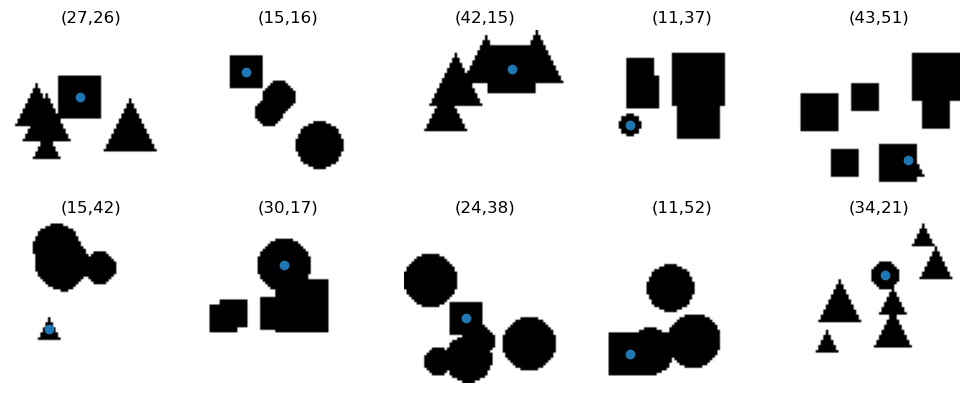

In [1]:
# ============================================================
# 0. Imports & device
# ============================================================
import torch, random, math, numpy as np
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ============================================================
# 1. Online dataset: 64×64, target = (cx,cy) ∈ [0,63]²  (float32)
# ============================================================
IMAGE = 64
SHAPES = ("circle", "square", "triangle")

def draw_shape(drawer, shape_type, center_x, center_y, radius):
    if shape_type == "circle":
        drawer.ellipse([center_x - radius, center_y - radius,
                        center_x + radius, center_y + radius], fill="black")
    elif shape_type == "square":
        drawer.rectangle([center_x - radius, center_y - radius,
                          center_x + radius, center_y + radius], fill="black")
    else:  # triangle
        drawer.polygon([
            (center_x, center_y - radius),
            (center_x - radius, center_y + radius),
            (center_x + radius, center_y + radius)
        ], fill="black")

class OddXYDataset(Dataset):
    """
    Generates images on-the-fly:
      * several random shapes of the same type
      * 1 additional shape of a different type
    Returns:
      * image (1×64×64 tensor, float32 normalized to [0,1])
      * label: float tensor [cx, cy] with center of the odd shape
    Arguments:
        num_samples             – total number of samples in the dataset
        same_shape_count_range – tuple (min, max), number of identical shapes
        shape_radius_range      – tuple (min_radius, max_radius) for shape size
    """
    def __init__(self,
                 num_samples,
                 same_shape_count_range=(3, 6),
                 shape_radius_range=(4, 10)):
        self.num_samples = num_samples
        self.same_shape_count_range = same_shape_count_range
        self.radius_min, self.radius_max = shape_radius_range

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        base_shape = random.choice(SHAPES)
        odd_shape = random.choice([s for s in SHAPES if s != base_shape])

        img = Image.new("L", (IMAGE, IMAGE), "white")
        drawer = ImageDraw.Draw(img)

        # draw identical shapes
        for _ in range(random.randint(*self.same_shape_count_range)):
            radius = random.randint(self.radius_min, self.radius_max)
            cx = random.randint(radius, IMAGE - radius - 1)
            cy = random.randint(radius, IMAGE - radius - 1)
            draw_shape(drawer, base_shape, cx, cy, radius)

        # draw the odd shape (with known center)
        radius = random.randint(self.radius_min, self.radius_max)
        cx = random.randint(radius, IMAGE - radius - 1)
        cy = random.randint(radius, IMAGE - radius - 1)
        draw_shape(drawer, odd_shape, cx, cy, radius)

        img_tensor = torch.tensor(np.array(img), dtype=torch.float32).unsqueeze(0) / 255.
        label_tensor = torch.tensor([float(cx), float(cy)], dtype=torch.float32)
        return img_tensor, label_tensor

def show_examples(num_examples=10):
    """
    Displays a grid of image samples from OddXYDataset using a DataLoader with batch_size=1.

    Args:
        num_examples (int): Number of examples to display.
    """
    dataset = OddXYDataset(num_samples=num_examples)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

    num_columns = 5
    num_rows = math.ceil(num_examples / num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))

    for i, (image, label) in enumerate(dataloader):
        if i >= num_examples:
            break
        image_np = image.squeeze(0).squeeze(0).numpy()  # B=1,C=1,H,W --> H,W
        cx, cy = label.squeeze(0)                       # B=1,2       --> 2
        axes.flat[i].imshow(image_np, cmap="gray")
        axes.flat[i].set_title(f"({cx:.0f},{cy:.0f})")
        axes.flat[i].axis("off")
        axes.flat[i].scatter(cx, cy) # added

    for j in range(i + 1, num_rows * num_columns):
        axes.flat[j].axis("off")

    plt.tight_layout()
    plt.show()



show_examples()

# Solution

# Elements of neural network

In [2]:
class PatchEmbedCNN(nn.Module):
    def __init__(self, in_ch=1, out_ch=16, kernel=20, stride=4):
        super().__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, kernel_size=kernel, stride=stride, padding=0)

    def forward(self, x):              # x: [B, 1, 64, 64]
        x = self.conv(x)               # -> [B, 16, 12, 12]
        x = x.flatten(2).transpose(1, 2)   # -> [B, 144, 16]
        return x

In [3]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=144):
        super().__init__()

        pe = torch.zeros(max_len, d_model)

        pos = torch.arange(max_len).float().unsqueeze(1)          # [L, 1]

        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-math.log(10000) / d_model)
        )                                                         # [d_model // 2]

        pe[:, 0::2] = torch.sin(pos * div_term)
        pe[:, 1::2] = torch.cos(pos * div_term)

        self.pe = pe

    def forward(self, x):          # x: [B, L, d_model]
        L = x.size(1)              # actual sequence length
        return x + self.pe[:L].to(x.device)

In [4]:
class SelfAttention(torch.nn.Module):
    def __init__(self, input_dim , output_dim, k):
        super().__init__()
        self.Q = torch.nn.Linear(input_dim, k)        # query projection d x k
        self.K = torch.nn.Linear(input_dim, k)        # key projection d x k
        self.V = torch.nn.Linear(input_dim, output_dim)      # value projection d x d_v
        self.k = k
        self.features = None # ADDED
        self.attention = None  # will store softmaxed attention weights for inspection later

    def forward(self, features):                        # size: batch, words, d
        self.features = features
        queries = self.Q(features)                      # size: batch, words, k
        keys = self.K(features)                         # size: batch, words, k
        values = self.V(features)                       # size: batch, words, d_v

        # Compute energy scores:
        energies = queries @ keys.transpose(-2, -1)     # size: batch, words, words
        energies = energies / (self.k ** 0.5)                # it is an additional rescale helping the stability

        # Normalize energies into attention weights
        self.attention = F.softmax(energies, dim=-1)         # size: batch, words, words

        # Apply attention weights to values:
        output = self.attention @ values                     # size: batch, words, d_v
        
        return output

In [5]:
class TokenClassifier(nn.Module):
    def __init__(self, input_dim, hidden):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, 1)         # logit per token
        )

    def forward(self, x):                # [B, L, 16]
        logits = self.mlp(x).squeeze(-1) # [B, L]
        probs  = F.softmax(logits, dim=-1)
        return probs

In [6]:
class SoftArgmax(nn.Module):
    def __init__(self, kernel=20, stride=4, grid=12):
        super().__init__()

        # centers of 20×20 windows, sampled every 4 px
        xx, yy = torch.meshgrid(
            torch.arange(grid), torch.arange(grid), indexing="xy"
        )                                           # [G, G]
        centers = torch.stack([xx, yy], -1).float() \
                  * stride + (kernel - 1) / 2       # [G, G, 2]

        self.centers = centers.reshape(-1, 2)       # [144, 2]

    def forward(self, probs):       # probs: [B, 144] (rows sum to 1)
        return probs @ self.centers.to(probs.device)  # [B, 2]  → (y, x)

# List of parameters


In [7]:
# here i am going to write all parameters
ONE_EPOCH = 25_000
BATCH_SIZE = 512

EPOCHS = 3000
INFO = 100

SEED = 2

LR = 0.001
WEIGHT_DECAY = 0.0001

INPUT_ATTENTION = 64
OUTPUT_ATTENTION = 64
K = 64
HIDDEN = 256

# Model

In [8]:
dataset = OddXYDataset(ONE_EPOCH)

loader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE 
)

In [9]:
class OddShapeDetector(nn.Module):
    def __init__(self, input_attention=INPUT_ATTENTION ,output_attention=OUTPUT_ATTENTION, k=K, hidden=HIDDEN):  #64,64,64,256, po 6000 zeszlo ponizej 25, batchsize = 512, nowy optimizer
        super().__init__()
        self.patch = PatchEmbedCNN(out_ch = input_attention)
        self.pos   = PositionalEncoding(d_model = input_attention)
        self.attn  = SelfAttention(input_dim = input_attention, output_dim = output_attention, k = k)
        self.cls   = TokenClassifier(input_dim = output_attention, hidden = hidden)
        self.sarg  = SoftArgmax()

    def forward(self, img):            # [B, 1, 64, 64]
        x = self.patch(img)            # [B, 144, 16]
        x = self.pos(x)
        x = self.attn(x)
        probs = self.cls(x)    # [B, 144]
        coords = self.sarg(probs)      # [B, 2] (x, y w px)
        return coords

In [10]:
import torch, torch.nn as nn
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

model = OddShapeDetector().to(device)
criterion = nn.MSELoss()                 # regresja współrzędnych
optim     = AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY) #bylo 0.001

scheduler = CosineAnnealingWarmRestarts(
    optim,
    T_0   = 50,    
    T_mult= 2,    
    eta_min = 1e-6
)

loss_history =[] 

for ep in range(1, EPOCHS + 1):
    model.train()
    running = 0.0
    for img, coord in loader:
        img, coord = img.to(device), coord.to(device)

        pred = model(img)          # [B,2]
        loss = criterion(pred, coord)

        optim.zero_grad()
        loss.backward()
        optim.step()

        running += loss.item() * img.size(0)

    #scheduler.step()
    lr_now = scheduler.get_last_lr()[0]
    loss_history += [running/len(loader.dataset)]

    if ep % INFO == 0:
        print(f"epoch {ep:2d}  loss {running/len(loader.dataset):.4f}  lr {lr_now:.3e} mean from last INFO epochs {sum(loss_history[ ep - INFO : ep+1 ]) / INFO:.4f}")

epoch 100  loss 70.3332  lr 1.000e-03 mean from last INFO epochs 92.1432
epoch 200  loss 58.7900  lr 1.000e-03 mean from last INFO epochs 64.5532
epoch 300  loss 54.2305  lr 1.000e-03 mean from last INFO epochs 56.6096
epoch 400  loss 51.3987  lr 1.000e-03 mean from last INFO epochs 52.2248
epoch 500  loss 50.3717  lr 1.000e-03 mean from last INFO epochs 49.6565
epoch 600  loss 46.2659  lr 1.000e-03 mean from last INFO epochs 47.2713
epoch 700  loss 45.1793  lr 1.000e-03 mean from last INFO epochs 45.7919
epoch 800  loss 41.9123  lr 1.000e-03 mean from last INFO epochs 44.2945
epoch 900  loss 40.5488  lr 1.000e-03 mean from last INFO epochs 42.7144
epoch 1000  loss 40.3207  lr 1.000e-03 mean from last INFO epochs 41.5255
epoch 1100  loss 37.9777  lr 1.000e-03 mean from last INFO epochs 40.4751
epoch 1200  loss 38.1145  lr 1.000e-03 mean from last INFO epochs 39.2604
epoch 1300  loss 37.9595  lr 1.000e-03 mean from last INFO epochs 38.0468
epoch 1400  loss 35.8757  lr 1.000e-03 mean fro

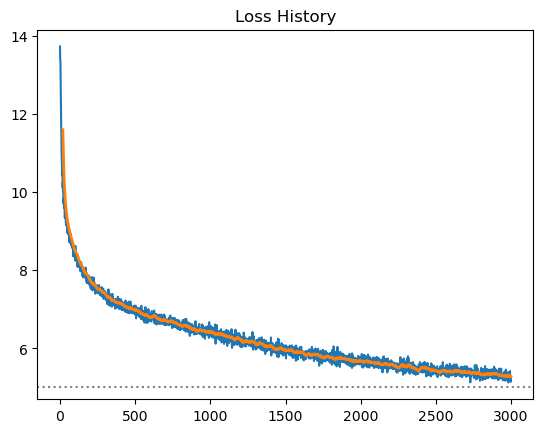

In [57]:
import math
window = 20

sqrt_loss = [math.sqrt(x) for x in loss_history]
ma = np.convolve(sqrt_loss, np.ones(window)/window, mode='valid')

plt.plot(sqrt_loss)
plt.plot(range(window-1, len(sqrt_loss)), ma,
         linestyle='-', linewidth=2, label=f'{window}-step MA')

plt.axhline(5, linestyle=':', color='gray')
plt.title("Loss History")
plt.show()

# Interpretation of model

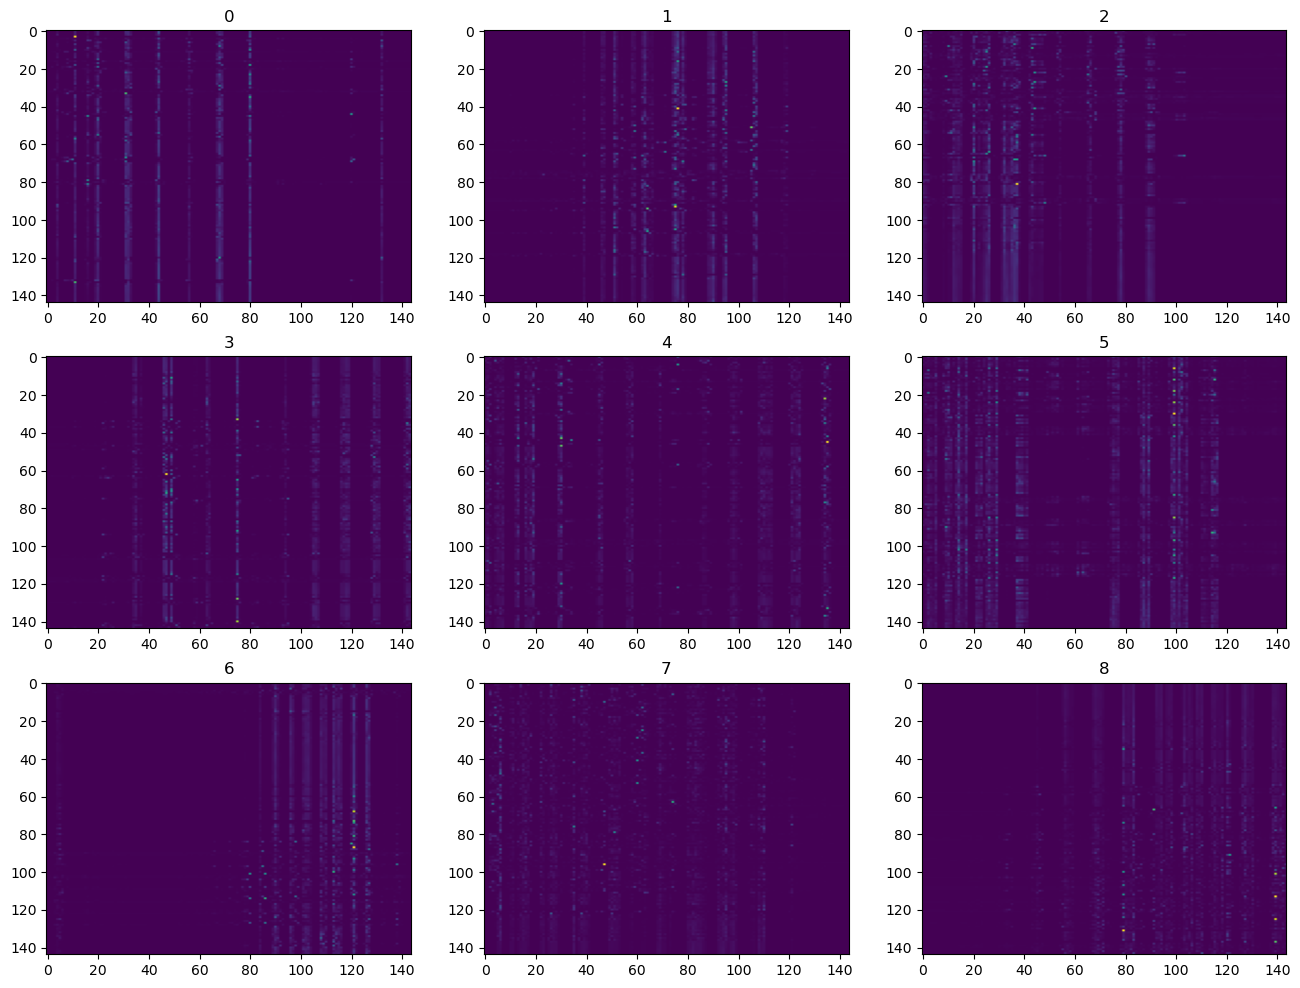

In [33]:
fig, axes = plt.subplots(3,3, figsize=(16, 12))
for idx, ax in enumerate(axes.flatten()):
    ax.imshow(model.attn.attention[idx].detach().cpu().numpy(), aspect='auto')
    ax.set_title(f'{idx}')

plt.show()